In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

# Clustering

In [68]:
#reading in the dataset
df = pd.read_csv("C:\\Users\\naja\\Desktop\\stroke-prediction-project\\data\\healthcare-dataset-stroke-data.csv")

In [69]:
#should be handled in the cleaning section of code 
df = df.fillna(df.median())

In [70]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


# Clusters by average glucose level and bmi

Clustering is about discovering groupings within continous variables and partitioning the id into
strategic groups. The best senario is to have clusters with high within-cluster similarity, but are very dissimilar to objects
in other clusters. In this section, we try to cluster relating to health-risk profiles. We assume health risk to occur, when a person has a high level of average glukose level and also a high bmi. 

BMI above 25 is considered overweight  

According to netdoktor.dk the glukose level should variate between 4-8 mmol/l (80-150 mg/dl)

https://www.netdoktor.dk/sunderaad/fakta/diabetesblodsukker.htm

https://netdoktor.dk/interactive/interactivetests/bmi.php

In [71]:
gluc_bmi = df[["avg_glucose_level","bmi"]]

In [100]:
#https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering
gluc_bmi = MinMaxScaler().fit_transform(gluc_bmi)
gluc_bmi = pd.DataFrame(gluc_bmi,columns=["avg_glucose_level","bmi"])
gluc_bmi.describe().round(2)

,avg_glucose_level,bmi
count,5110.00,5110.00
mean,0.24,0.21
std,0.21,0.09
min,0.00,0.00
25%,0.10,0.15
50%,0.17,0.20
75%,0.27,0.26
max,1.00,1.00


<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

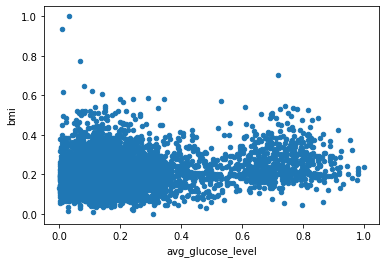

In [101]:
gluc_bmi.plot.scatter("avg_glucose_level","bmi")
#plt.axvline(150, color='k', linestyle='dashed', linewidth=1) #must be converted 
#plt.axhline(25, color='k', linestyle='dashed', linewidth=1) #must be converted 

### Finding the right k in k-means

In order to find the best fitting number of clusters, we evaluate different k's by the elbow and silhuette method

##### The elbow method
Distortion: Calculated as the avg of the squared distances from the cluster centers. Typically, the Euclidean distance metric is used.

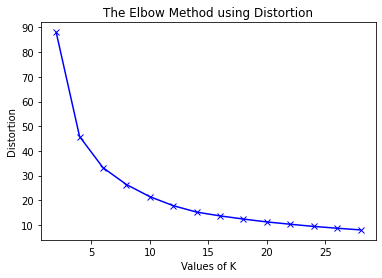

In [123]:
distortions = [] 
                 
K = range(2,30,2)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(gluc_bmi)
    kmeanModel.fit(gluc_bmi)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#### The silhouette method

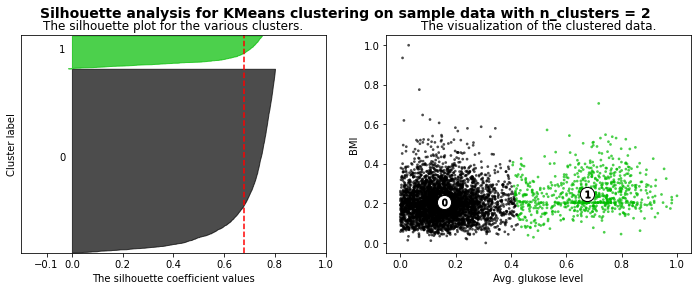

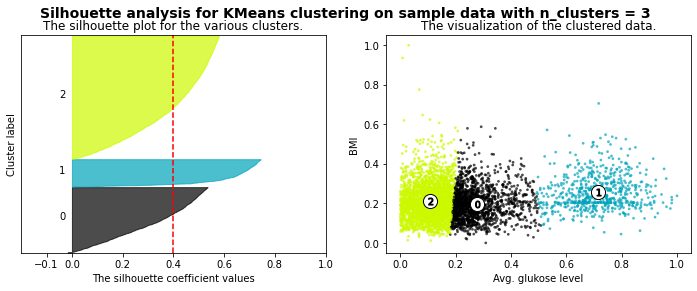

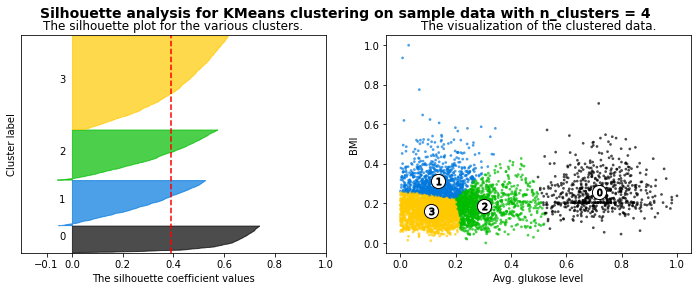

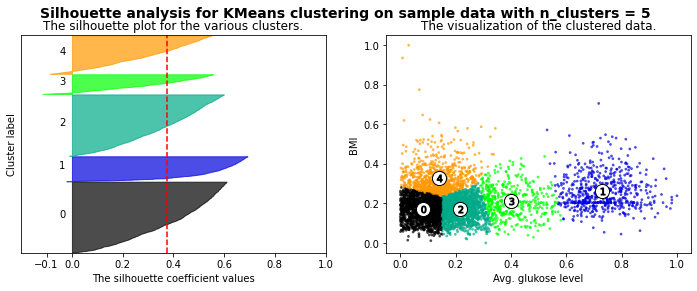

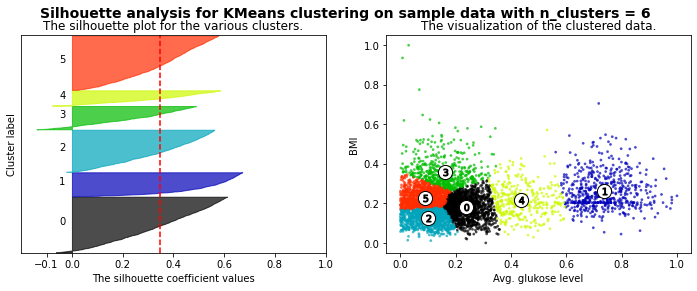

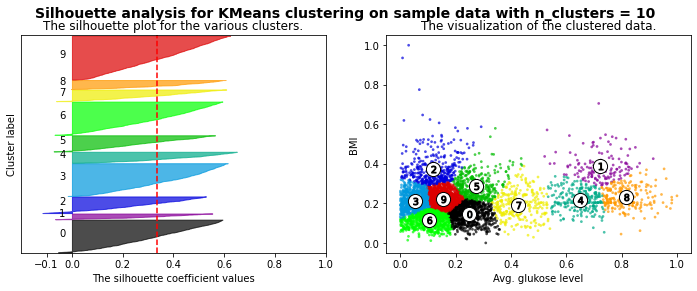

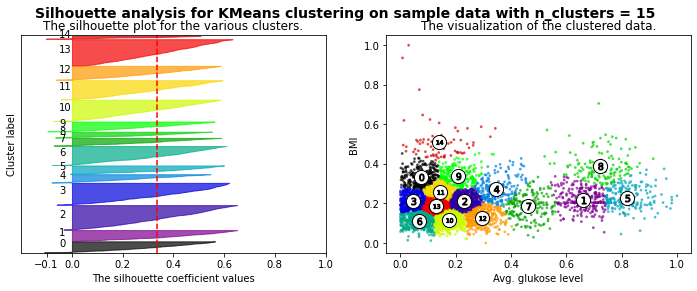

In [120]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

X = gluc_bmi

range_n_clusters = [2, 3, 4, 5, 6, 10, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    #print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X["avg_glucose_level"], X["bmi"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Avg. glukose level")
    ax2.set_ylabel("BMI")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Viewing the final k-means clusters

must be ajusted when settled on a k

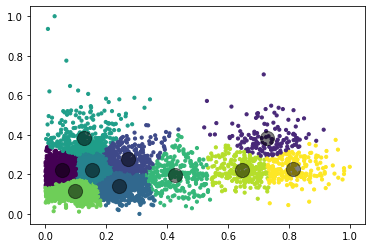

In [107]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(gluc_bmi)
y_kmeans = kmeans.predict(gluc_bmi)

plt.scatter(gluc_bmi["avg_glucose_level"], gluc_bmi["bmi"], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);